In [1]:
#lets do it better this time and not be stupid

In [2]:
import sympy as smp
import matplotlib.pyplot as plt
smp.init_printing(use_latex='mathjax')
from xnp import *
backend = 'cupy' if getattr(np, '__name__', '') == 'cupy' else 'numpy'

Using NumPy and SciPy on CPU


In [75]:
num = 200
l = 1
r0 = 1000000
RGrid = np.logspace(np.log10(1), np.log10(r0-10),num)

In [76]:
def integrand(r,r0,R,l):
    return np.sqrt(-(l**2 / (r**2 - R**2)) + ((r**2 - R**2)**3 * (r0**2 - r**2))/(l**6 * (r0**2 - R**2)))

In [77]:
#to make sure i didnt screw my algebra, let's define an alternative integrand
def f(r,R,l):
    return (r*2 - R**2)/(l**2)

def rp2(r,r0,R,l):
    return (f(r,R,l)**2 * f(r0,R,l) - f(r,R,l)**3) / f(r0,R,l)

def integrandAlt(r,r0,R,l):
    return np.sqrt(-(1/f(r,R,l)) + (f(r,R,l)/rp2(r,r0,R,l)))

In [84]:
#lets make a grid and just do it in loops for simplicity
rGrid = np.zeros([num,num])
for i in range(num):
    rGrid[i] = np.logspace(np.log10(RGrid[i]),np.log10(r0-10),num)

In [85]:
rGridAlt = np.linspace(100000,1000000,100)

In [87]:
vals = list(integrandAlt(rGrid,r0-5,1000,5))

In [88]:
action = np.trapz(vals,rGrid,axis=0)

/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_83447/988312049.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  action = np.trapz(vals,rGrid,axis=0)


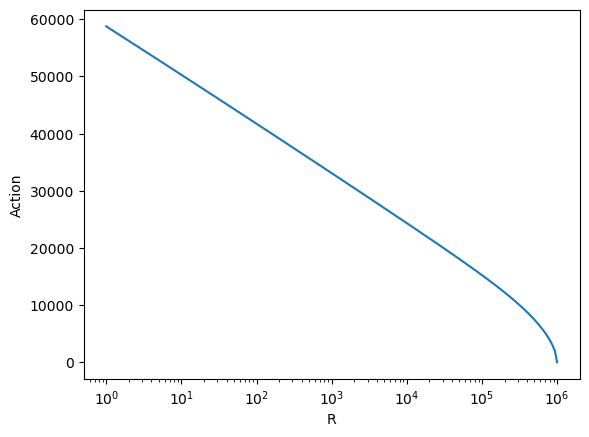

In [94]:
plt.plot(RGrid,action)
plt.xlabel('R')
plt.ylabel('Action')
plt.semilogx()
plt.show()
plt.close()